<h1>About the Data</h1>

This is a fictional data set created by IBM data scientists. It has included different factors that lead to employee attrition in any organization. The data set contains nominal, ordinal, and interval measurement types. The ordinal values are represented in increasing order of relevance as follows:

<ul>
<li>Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'</li>
<li>EnvironmentSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'</li>
<li>JobInvolvement: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'</li>
<li>JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'</li>
<li>PerformanceRating: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'</li>
<li>RelationshipSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'</li>
<li>WorkLifeBalance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'</li>
</ul>    


The data is available for download at the link below.
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/data 




# Analysis

In human resource, employee attrition refers to the loss of workforce through norman means such as resignation, and retirement as well as planned layoff without the intention of filing the vacated positions. Though employee attrition has an advantage as a way of reducing labour cost, it's generally percieved as a negative phenomenon because of the fact that any organization would find it difficult to survive without retaining its core employee base. 

In this analysis, we will adopt this same perception and, by answering the following questions, we will try to identify who is leaving the company, point out the potential reasons, and recommend areas of improvement. 

<ol>
    <li>What are the key factors that are playing into the current attrition rates</li>
    <li>Who is leaving the company?</li>
    <li>Is the company loosing experienced employees?</li>
    
</ol>



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

df = pd.read_csv('Employee-Attrition.csv') 

The overall attrition rate is <b>16.12 %</b> and it can be calculated as follows 

In [5]:
AttritionRate = len(df[df.Attrition == 'Yes']) / len(df) * 100
print(AttritionRate) 

16.122448979591837


In [122]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [119]:
df.shape

(1470, 35)

In [28]:
df.isnull().values.any() #Check for missing values

False

<h2>1. Factors that are playing into current attrition rate</h2>

Filtering the data by attrition and comparing the values for those who leave and those who stay will enable us to identify factors for investigation. 

In [6]:
df_Remain = df[df.Attrition == 'No']
df_Remain.describe() #Summery of values for employees who remained in the company 


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,403.208379,8.012633,1.027002,0.0,606.217074,1.071132,20.380754,0.692050,1.117933,...,1.071603,0.0,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,477.000000,2.000000,2.000000,1.0,483.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,817.000000,7.000000,3.000000,1.0,1022.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,1176.000000,13.000000,4.000000,1.0,1574.000000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [7]:
df_Attrition = df[df.Attrition == 'Yes']
df_Attrition.describe() #Summery of values for employees who leave the company

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,...,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.0,514.000000,1.000000,50.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,1.0,1017.000000,3.000000,66.000000,3.000000,1.000000,...,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,1.0,1486.000000,4.000000,84.000000,3.000000,2.000000,...,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


The two descriptions above show little to no difference in tha values of most corresponding columns. However, the following fields (in no particular order) show sizable difference and hence we'll investigate them further to see if they really contribute to employee attrition. 

<ul>
    <li>Distance From Home</li>
    <li>Job Level</li>
    <li>Stock Option Level</li>
</ul>

Now let's use histograms to see the differences between employees who stay and those who leave. 

<h3>Distance From Home</h3>

D1 mean:  10.632911392405063
D2 mean:  8.915652879156529


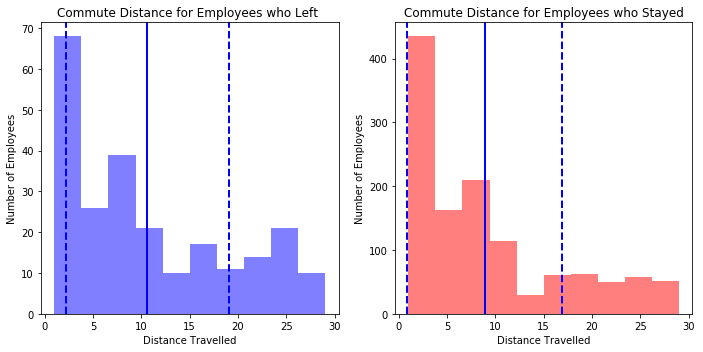

In [8]:
# Distance from home

plt.figure(figsize=(10, 5))

D1 = df_Attrition['DistanceFromHome'] # Work commute distance for employees who left
D2 = df_Remain['DistanceFromHome'] # Work commute distance for employees who remain

plt.subplot(1, 2, 1)
plt.hist(D1, color='blue', alpha=.5)
plt.xlabel('Distance Travelled')
plt.ylabel('Number of Employees')
plt.title('Commute Distance for Employees who Left ')
print('D1 mean: ', D1.mean())
print('D2 mean: ', D2.mean())

# add vertical line at the mean
plt.axvline(D1.mean(), color='b', linestyle='solid', linewidth=2)

# add vertical line at one standard deviation from either side of the mean 
plt.axvline(D1.mean() + D1.std(), color='b', linestyle='dashed', linewidth=2)

plt.axvline(D1.mean() - D1.std(), color='b', linestyle='dashed', linewidth=2)

plt.subplot(1, 2, 2)
plt.hist(D2, color='red', alpha=.5)
plt.title('Commute Distance for Employees who Stayed')
plt.xlabel('Distance Travelled')
plt.ylabel('Number of Employees')

# mark the mean and standard deviations with vertical lines

plt.axvline(D2.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(D2.mean() + D2.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(D2.mean() - D2.std(), color='b', linestyle='dashed', linewidth=2)

plt.tight_layout()
plt.show()



Employees who left the company travel longer distance to get to work as shown above and this could mean that this factor is likely to play a role for attrition. 

<h3>Job Level</h3>

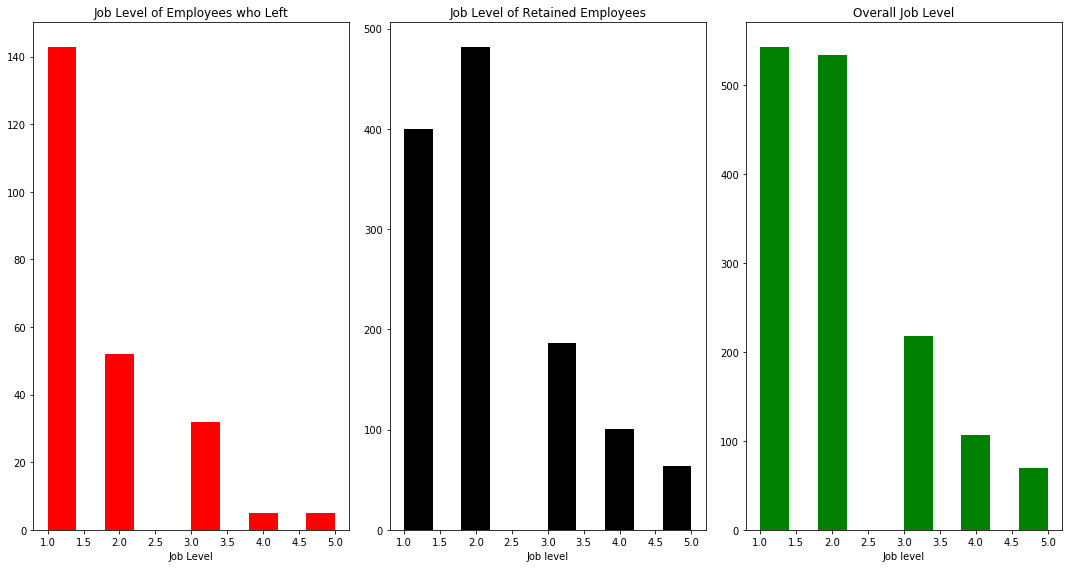

In [9]:
#Job level
J1 = df_Attrition['JobLevel']
J2 = df_Remain['JobLevel']
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)

plt.hist(J1, color='red')
plt.title('Job Level of Employees who Left')
plt.xlabel('Job Level')

plt.subplot(1, 3, 2)
plt.hist(J2, color='black')

plt.title('Job Level of Retained Employees')
plt.xlabel('Job level')

plt.subplot(1, 3, 3)
plt.hist(df['JobLevel'], color='green')

plt.title('Overall Job Level')
plt.xlabel('Job level')
plt.tight_layout()
plt.show()

The job level is evaluated on a scale of 1 to 5 with 1 representing low job value and 5 representing highest level. This is an important metric because employees are always interested in higher level jobs and if the company is not providing them with opportunities to do more fulfiling roles, they might look to competitors. As we can see from the graph above, only a small number of employees who have high job level are leaving the company. Making a comparision between the value for the employees who left, employees who remail in the company, and the overall data suggests that this factor might play a role in the employee attrition. 

<h3>Stock Option Level</h3>

Having a stock option of the company could help create a feeling of belongingness and ownership and as a consequence could result in a higher employee loyalty and lower attrition. We have already seen the  a difference in the average, standard deviation, and percentiles of the two sub category we've been analyzing (attrition vs remain). The difference in the averages seem significant. We will be able to see whether that is by chance or because of real differences in those groups by conducting a t-test.    



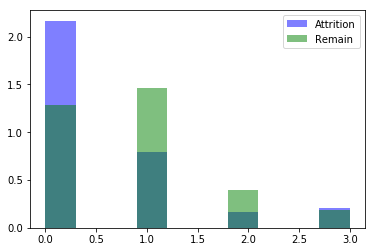

In [10]:
S1 = df_Attrition['StockOptionLevel'] #Stoke option value for attrition group
S2 = df_Remain['StockOptionLevel'] #Stock option value for remain group

plt.hist(S1, alpha=.5, normed=True, color='blue', label='Attrition')
plt.hist(S2, alpha=.5, normed=True, color='green', label='Remain')
plt.legend(loc='upper right')
plt.show()

The population doesn't show patterns of normal distribution. We will take random sample of 100 values from each group and plot them.

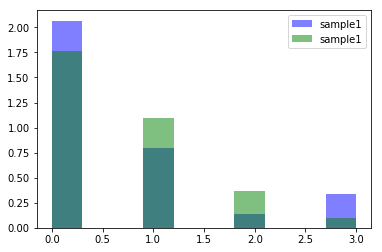

In [11]:
sample1 = np.random.choice(S1, 100, replace=True)
sample2 = np.random.choice(S2, 100, replace=True)

plt.hist(sample1, alpha=.5, color='blue', normed=True, label='sample1')
plt.hist(sample2, alpha=.5, color='green', normed=True, label='sample1')
plt.legend(loc='upper right')

plt.show()


Now we will calculate the mean and standard deviations of the two samples as well as the difference between the two means.

In [12]:
print('sample1 mean:', sample1.mean())
print('sample2 mean:', sample2.mean())
print('sample1 std:', sample1.std())
print('sample2 std:', sample1.std())

diff=sample2.mean() - sample1.mean()
print('difference:',diff)

sample1 mean: 0.62
sample2 mean: 0.64
sample1 std: 0.9568698971124548
sample2 std: 0.9568698971124548
difference: 0.020000000000000018


In [13]:
#create two array with the size of each variable and std for each variable

size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

#using the formula above

diff_se = (sum(sd ** 2 / size)) ** .5

print('t-value:', diff/diff_se) 



t-value: 0.1608515502444457


In [14]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=0.16004527173234773, pvalue=0.8730141151932228)


We get a hign pvalue of 0.242 for the associated t-value. Which means that we cannot use the t-test to conclude that the difference in the samples reflects the difference in the population.    

This analysis is best done with <b>Mnn-Whitney</b> test 

In [16]:
from scipy.stats import mannwhitneyu
mannwhitneyu (sample1, sample2)

MannwhitneyuResult(statistic=4662.0, pvalue=0.17615544568092362)

A p value of 0.176 (> 0.05) supports the null hypothesis. We can not conclude that stock option level contributes to attrition.  

<h2>2. Who is leaving the company?</h2>

Creating a persona of employees who leave the company could help create the necessary conditions to keep them. Let's see gender and maritial status with bar charts. Adding Other metrics such as maritial status and education will give a better picture. 

<h3>Gender</h3>

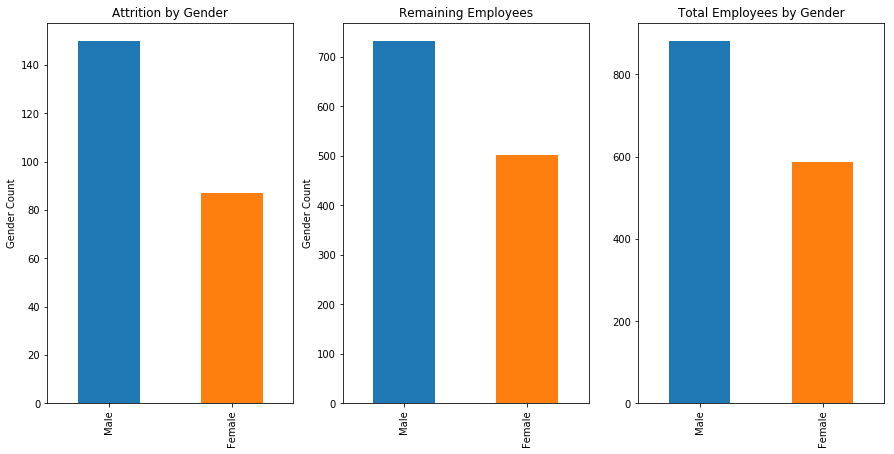

In [17]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
df_Attrition.Gender.value_counts().plot(kind='bar')

plt.title('Attrition by Gender')
plt.ylabel('Gender Count')

plt.subplot(1, 3, 2)
df_Remain.Gender.value_counts().plot(kind='bar')
plt.title('Remaining Employees')
plt.ylabel('Gender Count')

plt.subplot(1, 3, 3)
df.Gender.value_counts().plot(kind='bar')
plt.title('Total Employees by Gender')

plt.show()

As we can see form the graph above, the categories for remaining employees and the overall data seem to be represented with similar proportions of each sex. The attrition group seem to be have slightly more proportion of males than the other groups. 

<h3>Marital Status</h3>

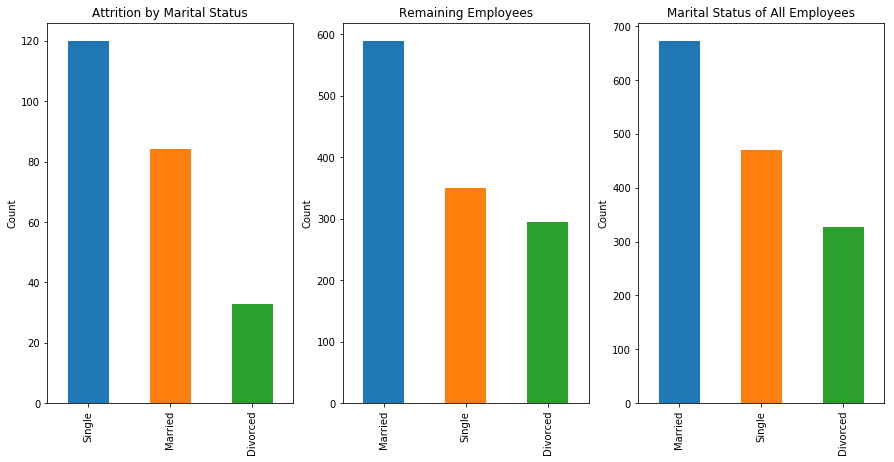

In [19]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
df_Attrition.MaritalStatus.value_counts().plot(kind='bar')

plt.title('Attrition by Marital Status')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
df_Remain.MaritalStatus.value_counts().plot(kind='bar')
plt.title('Remaining Employees')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
df.MaritalStatus.value_counts().plot(kind='bar')
plt.title('Marital Status of All Employees')
plt.ylabel('Count')

plt.show()

The graph above shows that employees who are divorced are less represented in the attrition group and married employees are represented in a higher proportion that the other groups.    

<h2>3. Is the company loosing experienced employees?</h2>

Loosing experienced employees could have an impact on the company's future. It is also importand to investigate whether retiring employees contributed to attrition rate. 

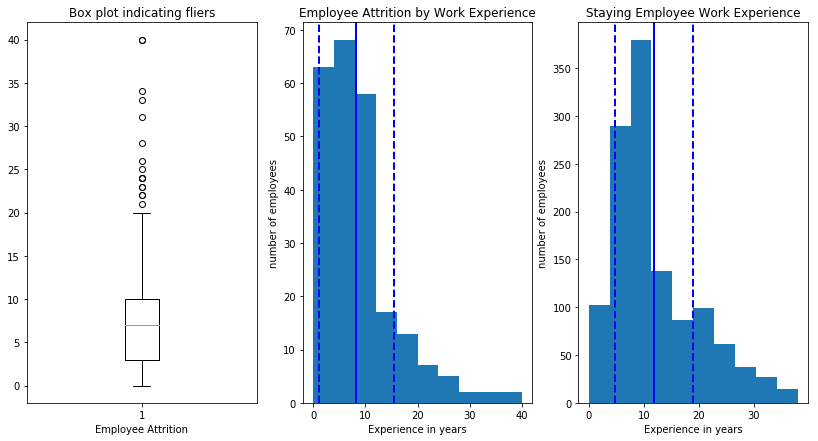

In [28]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 3, 1)
plt.boxplot(df_Attrition['TotalWorkingYears'])
plt.xlabel('Employee Attrition')
plt.title('Box plot indicating fliers')

plt.subplot(1, 3, 2)
plt.hist(df_Attrition['TotalWorkingYears'])
plt.xlabel('Experience in years')
plt.ylabel('number of employees')
plt.title('Employee Attrition by Work Experience')
# add vertical line at the mean
plt.axvline(df_Attrition['TotalWorkingYears'].mean(), color='b', linestyle='solid', linewidth=2)

# add vertical line at one standard deviation from either side of the mean 
plt.axvline(df_Attrition['TotalWorkingYears'].mean() + df_Attrition['TotalWorkingYears'].std(), color='b', linestyle='dashed', linewidth=2)

plt.axvline(df_Attrition['TotalWorkingYears'].mean() - df_Attrition['TotalWorkingYears'].std(), color='b', linestyle='dashed', linewidth=2)

plt.subplot(1, 3, 3)
plt.hist(df_Remain['TotalWorkingYears'])
plt.xlabel('Experience in years')
plt.ylabel('number of employees')
plt.title('Staying Employee Work Experience')

plt.axvline(df_Remain['TotalWorkingYears'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(df_Remain['TotalWorkingYears'].mean() + df_Attrition['TotalWorkingYears'].std(), color='b', linestyle='dashed', linewidth=2)

plt.axvline(df_Remain['TotalWorkingYears'].mean() - df_Attrition['TotalWorkingYears'].std(), color='b', linestyle='dashed', linewidth=2)

plt.show()




The attrition group has fliers which could represent people retiring. The graph shows that the attrition group is more represented by employees who have either low experience compared to the one who stay in the company. 

# Conclusion and recommendations 

This analysis is done with the notion that employee attrition affects the company negatively and that knowing the reasons for it would help to reduce the attrition rate. In the questions we have tried to identify the factors which play a role in attrition. We were able to identify commute distance and job level to be likely influence attrition. Similar analysis should be taked to identify other factors and get a better picture.

In the second question, we have tried to create a persona of employees who leave the company. We have identified some of the likely personalities in our analysis and concluded that married men are more likely to leave. Conducting similar analysis on metrics that relate to the personality of employees like age, education field, and others, it is possible to paint a clearer picture of who is leaving. 

The third question tries to address one of the fundamental questions that come with attrition - is the company looing experienced workers? the answer in our case was no. 